In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy

In [2]:
import scipy.interpolate
import numpy
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

In [3]:
model = load_model('models/subject_3')

/Users/noahcarniglia/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/layers/core.py:986: UserWarning: TA_CSPNN is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


In [4]:
# filters are stored as columns
temp_filts = model.layers[1].get_weights()[0][0,:,0,:] # shape (64,8)

In [5]:
spat_filts = model.layers[3].get_weights()[0][:,0,:,:] # shape (22,8,2)

### Params for temporal visuals

In [8]:
fs = 125
time = np.arange(64) / 125

### Params for spatial visuals

In [9]:
N = 300             # number of points for interpolation
xy_center = [2,2]   # center of the plot
radius = 2          # radius

# koord = [
#     [2, 3.5],   # 1
    
#     [0, 2.5],   # 2
#     [1, 2.5],   # 3
#     [2, 3],     # 4
#     [3, 2.5],   # 5
#     [4, 2.5],   # 6
    
#     [0, 2],     # 7
#     [0.66, 2],  # 8
#     [1.3, 2],   # 9
#     [2,2],      # 10
#     [2.66,2],   # 11
#     [3.22,2],   # 12
#     [4,2],      # 13
    
#     [0.2,1.2],  # 14
#     [1.2, 1.2], # 15
#     [2, 1.22],   # 16
#     [2.8,1.2],  # 17
#     [3.8,1.2],  # 18
    
#     [0.8,0.5],  # 19
#     [2, 0.66],   # 20
#     [3.3,0.5],  # 21
#     [2, 0],     # 22
# ]

koord = [
    [2, 3],     # 1
    
    [1, 2.5],   # 2
    [1.5, 2.5], # 3
    [2, 2.5],   # 4
    [2.5, 2.5], # 5
    [3, 2.5],   # 6
    
    [0.5, 2],   # 7
    [1, 2],     # 8
    [1.5, 2],   # 9
    [2,2],      # 10
    [2.5,2],    # 11
    [3,2],      # 12
    [3.5,2],    # 13
    
    [1,1.5],    # 14
    [1.5,1.5],  # 15
    [2, 1.5],   # 16
    [2.5,1.5],  # 17
    [3,1.5],    # 18
    
    [1.5,1],    # 19
    [2, 1.0],   # 20
    [2.5,1],    # 21
    [2, 0.5],   # 22
]
x,y = [],[]
for i in koord:
    x.append(i[0])
    y.append(i[1])

In [16]:
np.arange(0,70,10)

array([ 0, 10, 20, 30, 40, 50, 60])

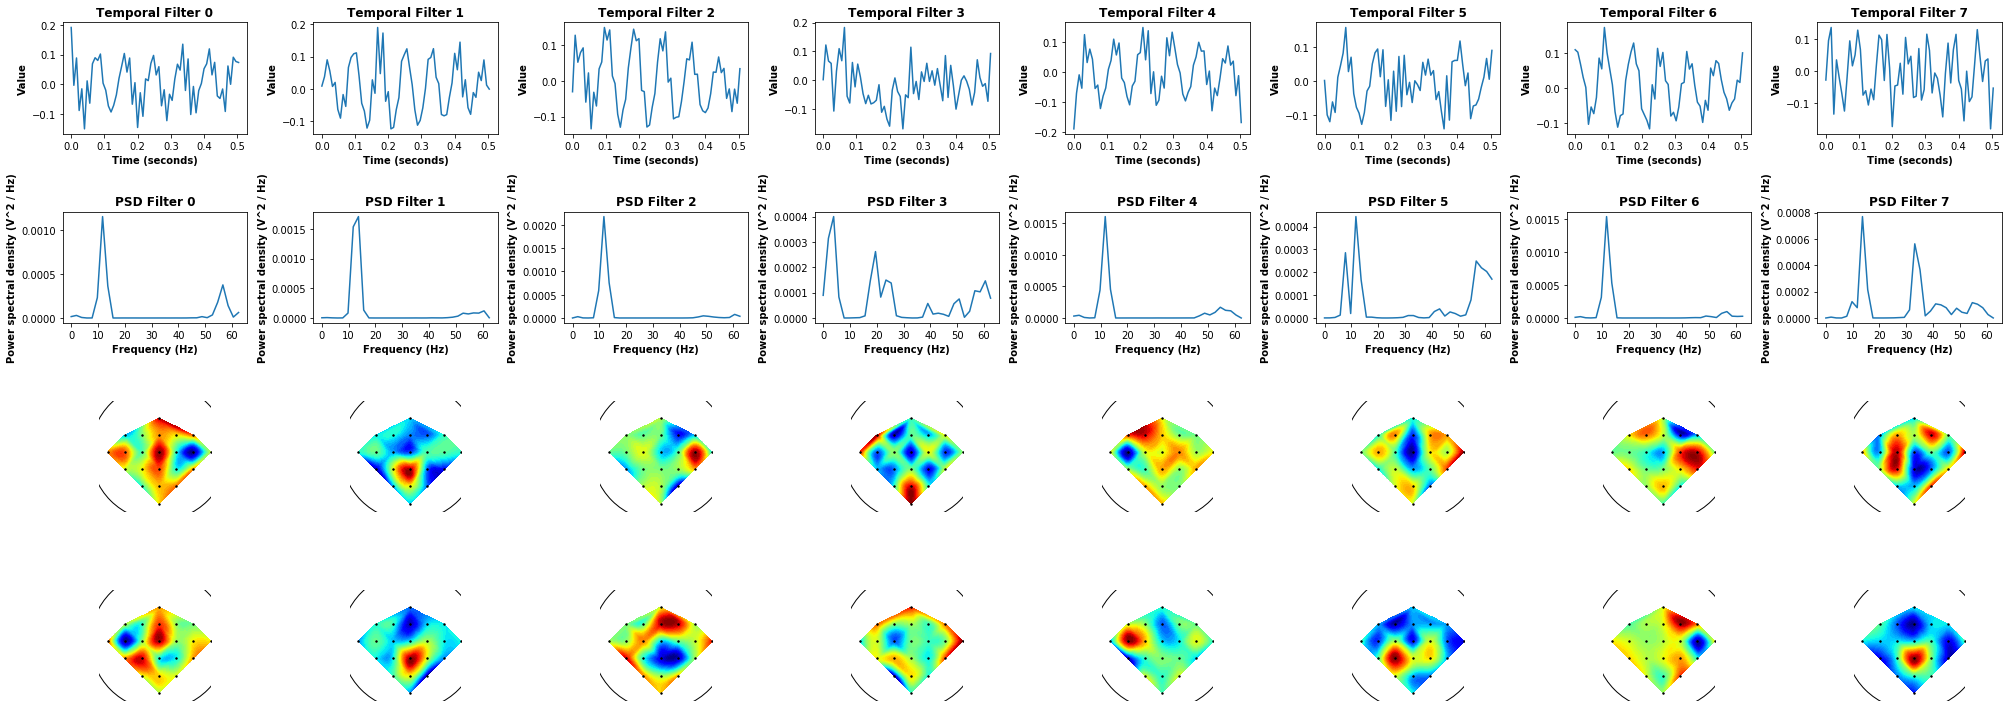

In [20]:
f, axs = plt.subplots(4,8, figsize=(28,10))
for t in range(temp_filts.shape[1]):
    filt = temp_filts[:,t]
    axs[0,t].plot(time, filt)
    axs[0,t].set_title(f"Temporal Filter {t}")
    axs[0,t].set_xlabel('Time (seconds)')
    axs[0,t].set_ylabel('Value')
    
    freqs, psd = signal.welch(filt, fs=fs, nperseg=64)
    axs[1,t].set_title(f"PSD Filter {t}")
    axs[1,t].set_xlabel('Frequency (Hz)')
    axs[1,t].set_ylabel('Power spectral density (V^2 / Hz)')
    axs[1,t].set_xticks(np.arange(0,70,10))
    axs[1,t].plot(freqs, psd)
    
    for s in range(spat_filts.shape[2]):
        sfilt = spat_filts[:,t,s]
        z = list(sfilt)
        xi = np.linspace(-2, 6, N)
        yi = np.linspace(-2, 6, N)
        zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    
        dr = xi[1] - xi[0]
        for i in range(N):
            for j in range(N):
                r = np.sqrt((xi[i] - xy_center[0])**2 + (yi[j] - xy_center[1])**2)
                if (r - dr/2) > radius:
                    zi[j,i] = "nan"
        
        axs[s+2, t].set_aspect(1)
        #axs[s+2, t].set_title(f"Spatial Kernel {s}")
        CS = axs[s+2, t].contourf(xi, yi, zi, 60, cmap = plt.cm.jet, zorder = 2.5)
        axs[s+2, t].contour(xi, yi, zi, 15, colors = "grey", zorder = 1)
        axs[s+2, t].scatter(x, y, marker = 'o', c = 'black', s = 2, zorder = 3)
        circle = matplotlib.patches.Circle(xy = xy_center, radius = radius, edgecolor = "k", facecolor = "none")
        axs[s+2, t].add_patch(circle)
        
        # make the axis invisible 
        for loc, spine in axs[s+2, t].spines.items():
            # use ax.spines.items() in Python 3
            spine.set_linewidth(0)

        # remove the ticks
        axs[s+2, t].set_xticks([])
        axs[s+2, t].set_yticks([])
        # set axes limits
#         axs[s+2, t].set_xlim(-0.5, 4.5)
#         axs[s+2, t].set_ylim(-0.5, 4.5)
        axs[s+2, t].set_xlim(0.25,3.5)
        axs[s+2, t].set_ylim(0.25,3.5)

f.tight_layout()
plt.savefig('horiz_filter_vis_2', dpi=300)
plt.show()